In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as f
import numpy as np 
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt 
import auto_encoder

In [2]:
get_dataset = auto_encoder.get_dataset
data_2 = '2_qubit_crit_data.npz'
data_4 = '4_qubit_crit_data.npz'
data_6 = '6_qubit_crit_data.npz'
data_7 = '7_qubit_crit_data.npz'
data_10 = '10_qubit_crit_data.npz'

data_11 = '11_qubit_crit_data.npz'
data_12 = '12_qubit_crit_data.npz'



training_n_sizes = [2,4,7]
validation_n_sizes = [6,2,4,7]


training_data_2 = get_dataset(data_2, 2, 10000)
training_data_4 = get_dataset(data_4,4,10000)
training_data_7 = get_dataset(data_7,7,10000) 

training_data_2, val_data_2 = random_split(training_data_2, [9000,1000])
training_data_4, val_data_4 = random_split(training_data_4, [9000,1000])
training_data_7, val_data_7 = random_split(training_data_7, [9000,1000])

training_data_10 = get_dataset(data_10,10,10000)


datasets = [training_data_2,
            training_data_4,
            training_data_7]

training_loaders = [DataLoader(x, batch_size = 32,  shuffle=True, num_workers=20) for x in datasets]

val_data_6 = get_dataset(data_6, 6, 10000)

val_datasets = [val_data_6, val_data_2, val_data_4, val_data_7]

val_loaders = [DataLoader(x,batch_size = 10000, num_workers=20) for x in val_datasets]

test_loader = DataLoader(training_data_10, batch_size = 10000, num_workers = 20)

In [4]:
warmup_2 = next(iter(training_loaders[0]))
warmup_4 = next(iter(training_loaders[1]))
warmup_7 = next(iter(training_loaders[2]))

In [22]:
mps_size = 5
model = auto_encoder.MPS_autoencoder(mps_size = mps_size)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = nn.MSELoss(reduction='sum')

warmup_data = [(warmup_2,2), (warmup_4,4), (warmup_7,7)]

for j in range(10):
    for i in range(3):
        for epoch in range(10):
            fields,wf = warmup_data[i][0]
            gs = model(fields, warmup_data[i][1])            
            loss = loss_func(gs, wf)
            if (epoch % 10 == 0):
                print(warmup_data[i][1],"\t", loss.item() *(2**warmup_data[i][1]))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

2 	 122.853271484375
4 	 197.27664184570312
7 	 6949.3046875
2 	 9.041206359863281
4 	 112.32148742675781
7 	 1536.6339111328125
2 	 5.426027774810791
4 	 78.13994598388672
7 	 1138.8106689453125
2 	 6.166365146636963
4 	 39.126041412353516
7 	 1069.7977294921875
2 	 3.609788417816162
4 	 28.166791915893555
7 	 847.839111328125
2 	 2.7399895191192627
4 	 47.375267028808594
7 	 591.4224243164062
2 	 3.120905876159668
4 	 20.565092086791992
7 	 639.1176147460938
2 	 2.0202994346618652
4 	 26.03826332092285
7 	 376.15911865234375
2 	 1.542576789855957
4 	 16.09923553466797
7 	 405.84661865234375
2 	 2.9080331325531006
4 	 14.278937339782715
7 	 179.03565979003906


In [ ]:
for j in range(10):
    print("Cycle: \t", j)
    print("*"*40)
    for i in range(3):
        for epoch in range(201):
            fields,wf = warmup_data[i][0]
            gs = model(fields, warmup_data[i][1])            
            loss = loss_func(gs, wf)
            if (epoch % 100 == 0):
                print(warmup_data[i][1],"\t", loss.item()*(2**warmup_data[i][1]))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [24]:
warmup_2 = next(iter(training_loaders[0]))
warmup_4 = next(iter(training_loaders[1]))
warmup_7 = next(iter(training_loaders[2]))
warmup_data = [(warmup_2,2), (warmup_4,4), (warmup_7,7)]


for j in range(10):
    for i in range(3):
        for epoch in range(10):
            fields,wf = warmup_data[i][0]
            gs = model(fields, warmup_data[i][1])            
            loss = loss_func(gs, wf)
            if (epoch % 10 == 0):
                print(warmup_data[i][1],"\t", loss.item() *(2**warmup_data[i][1]))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

2 	 0.8236885666847229
4 	 6.365555286407471
7 	 96.57893371582031
2 	 1.326112985610962
4 	 13.187267303466797
7 	 273.186279296875
2 	 0.5816278457641602
4 	 9.770345687866211
7 	 188.0302276611328
2 	 1.9618685245513916
4 	 13.755720138549805
7 	 238.56886291503906
2 	 1.8500823974609375
4 	 13.936062812805176
7 	 205.55921936035156
2 	 0.4618815779685974
4 	 3.227435350418091
7 	 186.06654357910156
2 	 1.1628656387329102
4 	 16.42013931274414
7 	 77.50804138183594
2 	 0.46521854400634766
4 	 5.726676940917969
7 	 142.70201110839844
2 	 0.5135645866394043
4 	 4.9700236320495605
7 	 92.72976684570312
2 	 0.4788503050804138
4 	 3.259235382080078
7 	 55.600948333740234


In [37]:
warmup_data = [(warmup_2,2), (warmup_4,4), (warmup_7,7)]
f = open("warmup_data_2.p", 'wb')
pickle.dump(warmup_data, f)
f.close()

In [35]:
import pickle
f = open("warmup_data_1.p", 'wb')
pickle.dump(warmup_data, f)
f.close()

In [25]:
val_6 = next(iter(val_loaders[0]))
val_2 = next(iter(val_loaders[1]))
val_4 = next(iter(val_loaders[2]))
val_7 = next(iter(val_loaders[3]))
val_10 = next(iter(test_loader)) 

In [26]:
val_data = [(val_6,6),(val_2,2),(val_4,4),(val_7,7), (val_10,10)]
loss_func = nn.MSELoss()
for data, size in val_data:
    with torch.no_grad():
        fields, wf = data
        gs = model(fields, size)
        loss = loss_func(gs,wf)
        print(size,"\t" ,loss.item() * (2**size))
#         print(gs[0], wf[0])
#         print(gs[-1], wf[-1])        

6 	 0.008454023860394955
2 	 0.006375923287123442
4 	 0.012206712737679482
7 	 0.005880001932382584
10 	 0.031192129477858543


In [36]:
f = open("test_data_1.p", 'wb')
pickle.dump(val_data, f)

In [ ]:
device = torch.device("cpu")
for N, train_loader in enumerate(training_loaders):            
    temp = 0
    sys_size = training_n_sizes[N]
    for i, (fields,wf) in enumerate(train_loader):
        fields = fields.to(device)
        gs = model(fields, sys_size)            
        loss = loss_func(gs, wf.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        temp += loss.item()
    temp = temp / (len(train_loader))    

In [31]:
# mag_loaders = [DataLoader(x,batch_size = 10000, num_workers=20) for x in val_datasets]
def seq_to_magnetization(arr_seq, num_qubits):
    
    mag_vec = []
    for elem in arr_seq:
        magnetization = 0
        for char in elem:
            temp = (int(char)*-2)+1
            magnetization += temp 
        mag_vec.append(magnetization)
    mag_vec = np.array(mag_vec)
    mag_vec = mag_vec / (num_qubits)
    return mag_vec   

def seq_gen(num_q):
    if num_q == 2:
        return ['00','01', '10','11']
    else:
        temp = []
        
        smaller_vals = seq_gen(num_q-1)
        for i in ['0','1']:
            for each in smaller_vals:
                temp.append(i+each)
        return temp 
    
def gen_graph(model):
    data_sizes = [2,4,6,7,10]
    training_data_2 = get_dataset(data_2, 2, 10000)
    training_data_4 = get_dataset(data_4,4,10000)
    training_data_7 = get_dataset(data_7,7,10000) 
    val_data_6 = get_dataset(data_6, 6, 10000)
    training_data_10 = get_dataset(data_10,10,10000)
    mag_dat = [training_data_2,training_data_4,val_data_6,training_data_7,training_data_10]
    mag_loaders = [DataLoader(x,batch_size = 10000, num_workers=20) for x in mag_dat]
    
    model.eval()
    with torch.no_grad():
        n_systems = {}
        for j,loader in enumerate((mag_loaders)):
            sys_size = data_sizes[j]
            wave_functions = []
            true_wave = []
            for i, (fields,wf) in enumerate(loader):
                fields = fields
                gs = model(fields, sys_size)

                wave_functions.append(gs)
                true_wave.append(wf)
                
            n_systems[sys_size] = (wave_functions,true_wave)


    data_y_2 = n_systems[2][0][0].numpy()
    data_y_4 = n_systems[4][0][0].numpy()
    data_y_7 = n_systems[7][0][0].numpy()
    data_y_6 = n_systems[6][0][0].numpy()
    data_y_10 = n_systems[10][0][0].numpy()
    
    
#     print(data_y_2.shape)
    data_y_2_t = n_systems[2][1][0].numpy()
    data_y_4_t = n_systems[4][1][0].numpy()
    data_y_7_t = n_systems[7][1][0].numpy()
    data_y_6_t = n_systems[6][1][0].numpy()
    data_y_10_t = n_systems[10][1][0].numpy()
    
    vec = seq_to_magnetization(seq_gen(2),2)
    vec_2 = (vec.view()).reshape((4,1))
    mag_2 = np.squeeze((np.power(data_y_2,2) @ vec_2))
    mag_2_t = np.squeeze((np.power(data_y_2_t,2) @ vec_2))
    
    vec_4 = seq_to_magnetization(seq_gen(4),4).reshape((16,1))
    mag_4 = np.squeeze((np.power(data_y_4,2) @ vec_4))
    mag_4_t = np.squeeze((np.power(data_y_4_t,2) @ vec_4))
    
    vec_6 = seq_to_magnetization(seq_gen(6),6).reshape((64,1))
    mag_6 = np.squeeze((np.power(data_y_6,2) @ vec_6))
    mag_6_t = np.squeeze((np.power(data_y_6_t,2) @ vec_6))
    
    vec_7 = seq_to_magnetization(seq_gen(7),7).reshape((128,1))
    mag_7 = np.squeeze((np.power(data_y_7,2) @ vec_7))
    mag_7_t = np.squeeze((np.power(data_y_7_t,2) @ vec_7))
    
    vec_10 = seq_to_magnetization(seq_gen(10),10).reshape((1024,1))
    mag_10 = np.squeeze((np.power(data_y_10,2) @ vec_10))
    mag_10_t = np.squeeze((np.power(data_y_10_t,2) @ vec_10))

    x = np.linspace(0,3,10000)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6))
    
    ax1.plot(x,mag_2, label='2 Qubits')
    ax1.plot(x,mag_4, label='4 Qubits')
    ax1.plot(x,mag_6, label='6 Qubits')
    ax1.plot(x,mag_7, label='7 Qubits')
    ax1.plot(x,mag_10, label='10 Qubits')
    
    
    ax2.plot(x,mag_2_t, label='2 Qubits')
    ax2.plot(x,mag_4_t, label='4 Qubits')
    ax2.plot(x,mag_6_t, label='6 Qubits')    
    ax2.plot(x,mag_7_t, label='7 Qubits')
    ax2.plot(x,mag_10_t, label='10 Qubits')
    

    #     plt.plot(x,mag_10, label='10 Qubits')


    ax1.legend()
    ax2.legend()
    ax1.set_title("MPS Generated Magnetization")
    ax2.set_title("Ground Truth Magnetization")
    ax1.set_xlabel("Bx")
    ax1.set_ylabel("Magnetization")
#     ax1.title('J=1, Bz=0.01')
#     ax1.xlabel("Bx")
#     ax1.ylabel("Magnetization")
    
    

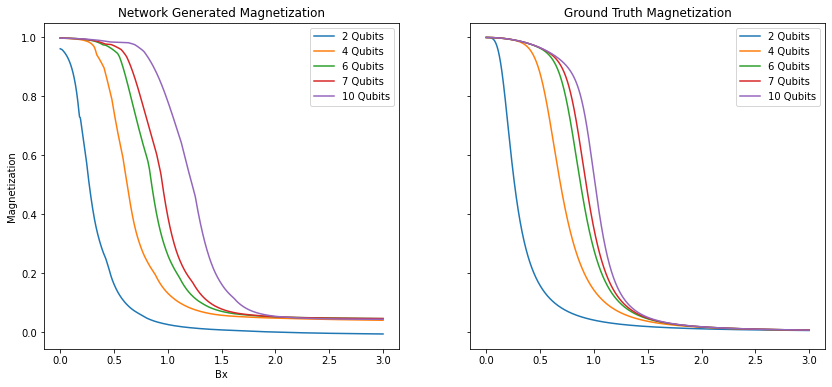

In [32]:
gen_graph(model)

In [33]:
torch.save(model.state_dict(), "Final_Model_MPS_5.pt")

In [6]:
def get_model(mps_size):
    PATH = "{}_site_model.pt".format(mps_size)
    device = torch.device('cpu')
    model = auto_encoder.MPS_autoencoder(mps_size)
    model.load_state_dict(torch.load(PATH, map_location=device))
    return model 

In [ ]:
model = get_model(2)

with torch.no_grad():
    encoded_spin_up = []
    encoded_spin_down = []
    
    
#     for i,(fields,wf) in enumerate(val_loader_4):
#         spin_up, spin_down = model.encode(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
#         encoded_spin_up.append(spin_up.squeeze())
#         encoded_spin_down.append(spin_down.squeeze())
        
#     for i,(fields,wf) in enumerate(val_loader_7):
#         spin_up, spin_down = model.encode(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
#         encoded_spin_up.append(spin_up.squeeze())
#         encoded_spin_down.append(spin_down.squeeze())
        
    for i,(fields,wf) in enumerate(training_loaders[0]):
        spin_up, spin_down = model.encode(fields)
        print(fields)
        print(spin_up.squeeze().shape)
        print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())
        
    for i,(fields,wf) in enumerate(training_loaders[1]):
        spin_up, spin_down = model.encode(fields)
        print(spin_up.squeeze().shape)
        print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())  

In [17]:
model = get_model(2)

with torch.no_grad():
    encoded_spin_up = []
    encoded_spin_down = []        
       
    for i,(fields,wf) in enumerate(val_loaders[0]):
        spin_up, spin_down = model.encode(fields)
#         print(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())
        
    for i,(fields,wf) in enumerate(val_loaders[1]):
        spin_up, spin_down = model.encode(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())  

torch.Size([100, 2, 2])
torch.Size([100, 2, 2])
torch.Size([100, 2, 2])
torch.Size([100, 2, 2])


In [18]:
data_up = encoded_spin_up[0].numpy()
data_down = encoded_spin_down[0].numpy()
for i in range(1, len(encoded_spin_up)):
    data_up = np.vstack((data_up, encoded_spin_up[i].numpy()))
    data_down = np.vstack((data_down, encoded_spin_down[i].numpy()))
    
print(data_up.shape)
print(data_down.shape)

(200, 2, 2)
(200, 2, 2)


In [19]:
data_up = data_up.reshape((data_up.shape[0],4))
data_down = data_down.reshape((data_up.shape[0],4))

In [32]:
np.savetxt("mps_2_up_matrix.csv", data_up, delimiter=",")
np.savetxt("mps_2_down_matrix.csv", data_down, delimiter=",")

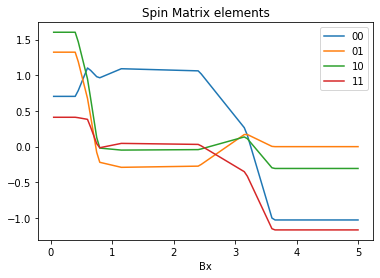

In [33]:
x = np.arange(1,101)
x = x / (100) * 5

plt.plot(x,data_up[0:100,0], label='00')
plt.plot(x,data_up[0:100,1], label='01')
plt.plot(x,data_up[0:100,2], label='10')
plt.plot(x,data_up[0:100,3], label='11')
plt.xlabel('Bx')
plt.title('Spin Matrix elements')
plt.legend()

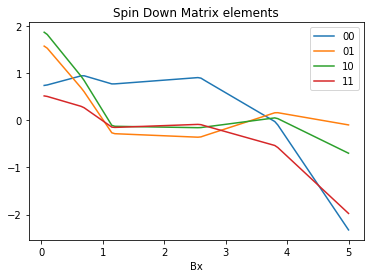

In [34]:
x = np.arange(1,101)
x = x / (100) * 5
k = 2
m = k-1
plt.plot(x,data_up[100*m:100*k,0], label='00')
plt.plot(x,data_up[100*m:100*k,1], label='01')
plt.plot(x,data_up[100*m:100*k,2], label='10')
plt.plot(x,data_up[100*m:100*k,3], label='11')
plt.xlabel('Bx')
plt.title('Spin Down Matrix elements')
plt.legend()

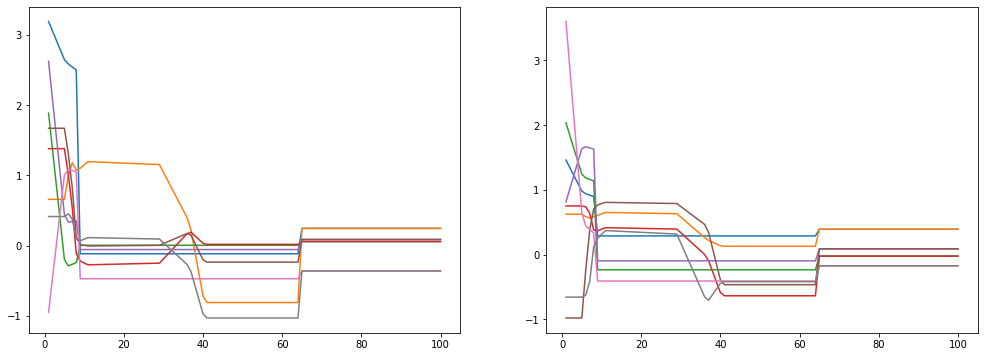

In [14]:
x = np.arange(1,101)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,6))

for i in range(4):
    for k in range(1):
        ax1.plot(x,data_up[100*k:100*(k+1),i])
        ax2.plot(x,data_down[100*k:100*(k+1),i])


(3100, 72)
(1000,)


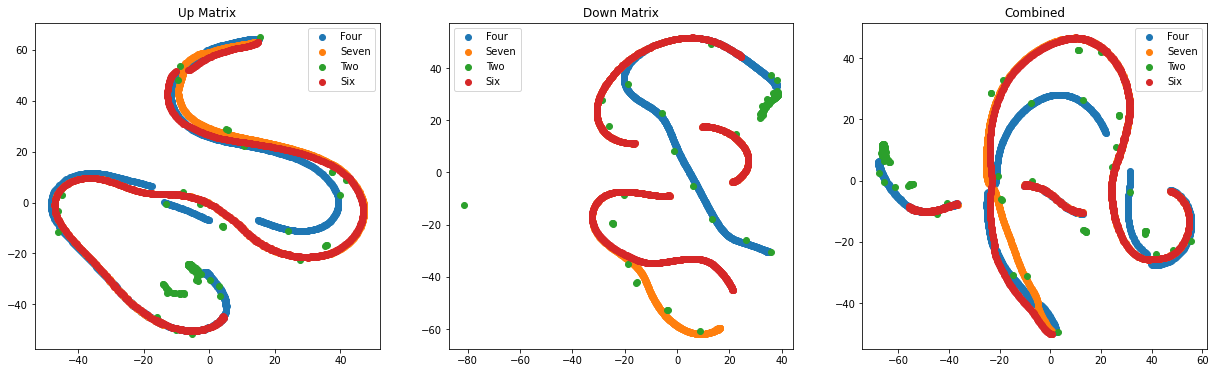

In [140]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

up=data_up
down=data_down
data = np.hstack((data_up, data_down))

print(data.shape)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,6))

pca = TSNE(n_components=2, perplexity=50)

up = pca.fit_transform(up)
down = pca.fit_transform(down)
data = pca.fit_transform(data)

print(up[:1000][:,0].shape)
ax1.scatter(up[:1000][:,0],up[:1000][:,1] ,label='Four')
ax1.scatter(up[1000:2000][:,0],up[1000:2000][:,1] ,label='Seven')
ax1.scatter(up[2000:2100][:,0],up[2000:2100][:,1] ,label='Two')
ax1.scatter(up[2100:][:,0],up[2100:][:,1] ,label='Six')
ax1.set_title('Up Matrix')

ax1.legend()

ax2.scatter(down[:1000][:,0],down[:1000][:,1] ,label='Four')
ax2.scatter(down[1000:2000][:,0],down[1000:2000][:,1] ,label='Seven')
ax2.scatter(down[2000:2100][:,0],down[2000:2100][:,1] ,label='Two')
ax2.scatter(down[2100:][:,0],down[2100:][:,1] ,label='Six')
ax2.set_title('Down Matrix')

ax2.legend()

ax3.scatter(data[:1000][:,0],data[:1000][:,1] ,label='Four')
ax3.scatter(data[1000:2000][:,0],data[1000:2000][:,1] ,label='Seven')
ax3.scatter(data[2000:2100][:,0],data[2000:2100][:,1] ,label='Two')
ax3.scatter(data[2100:][:,0],data[2100:][:,1] ,label='Six')
ax3.set_title('Combined')
ax3.legend()




(1000,)


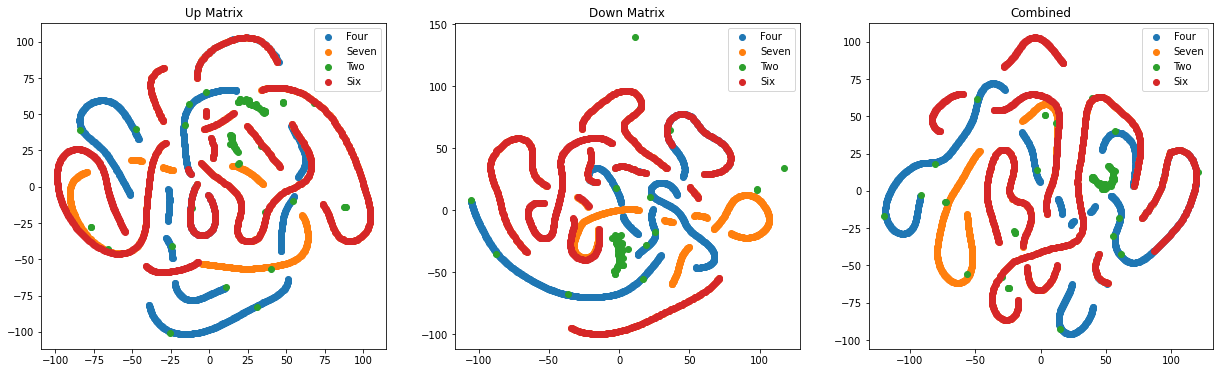

In [138]:
from sklearn.decomposition import PCA
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,6))

pca = PCA(n_components=2)

up = pca.fit_transform(up)
down = pca.fit_transform(down)
data = pca.fit_transform(data)

print(up[:1000][:,0].shape)
ax1.scatter(up[:1000][:,0],up[:1000][:,1] ,label='Four')
ax1.scatter(up[1000:2000][:,0],up[1000:2000][:,1] ,label='Seven')
ax1.scatter(up[2000:2100][:,0],up[2000:2100][:,1] ,label='Two')
ax1.scatter(up[2100:][:,0],up[2100:][:,1] ,label='Six')
ax1.set_title('Up Matrix')

ax1.legend()

ax2.scatter(down[:1000][:,0],down[:1000][:,1] ,label='Four')
ax2.scatter(down[1000:2000][:,0],down[1000:2000][:,1] ,label='Seven')
ax2.scatter(down[2000:2100][:,0],down[2000:2100][:,1] ,label='Two')
ax2.scatter(down[2100:][:,0],down[2100:][:,1] ,label='Six')
ax2.set_title('Down Matrix')

ax2.legend()

ax3.scatter(data[:1000][:,0],data[:1000][:,1] ,label='Four')
ax3.scatter(data[1000:2000][:,0],data[1000:2000][:,1] ,label='Seven')
ax3.scatter(data[2000:2100][:,0],data[2000:2100][:,1] ,label='Two')
ax3.scatter(data[2100:][:,0],data[2100:][:,1] ,label='Six')
ax3.set_title('Combined')
ax3.legend()